In [123]:
import pandas as pd
import matplotlib.pyplot as plt

## Importing the data

In [124]:
#Reading the csv file
df = pd.read_csv("training.1600000.processed.noemoticon.csv", header=None,
                 names=["target", "ids", "date", "flag", "user", "text"], encoding='latin1')


In [125]:
#printing only the first 5 rows of the dataset
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


### EDA for the dataset

In [126]:
null_counts = df.isnull().sum()

# Print the null counts for each column
print("Null counts in each column:")
print(null_counts)

Null counts in each column:
target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64


##### We see that there are NO NULLS IN DATASET

In [127]:

# Assuming 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract day, month, and year for grouping
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

#Printing the number of tweets per month
df['month'].value_counts()

6    923608
5    576367
4    100025
Name: month, dtype: int64

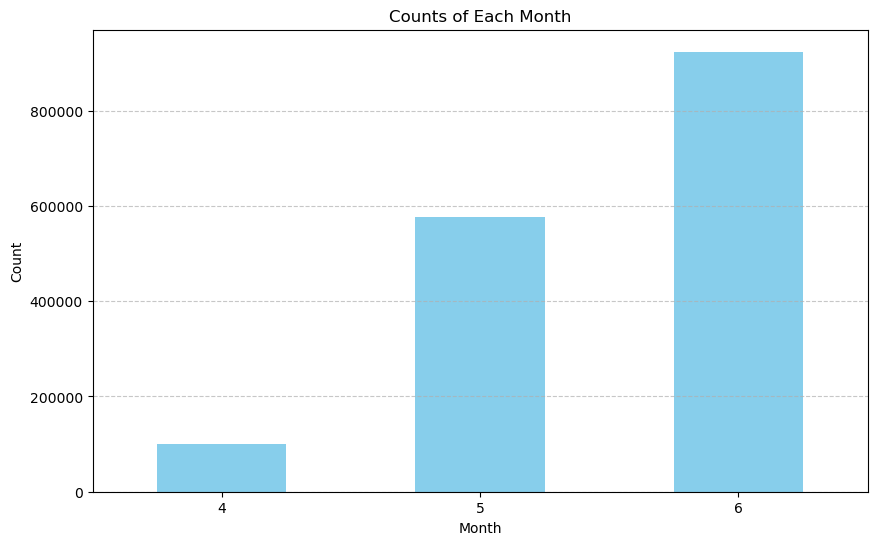

In [128]:

month_counts = df['month'].value_counts()

# Plot a bar chart of month counts
plt.figure(figsize=(10, 6))
month_counts.sort_index().plot(kind='bar', color='skyblue')
plt.title('Counts of Each Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#####  INFERENCE: We see the month of June 2009 has the least number of tweets. 

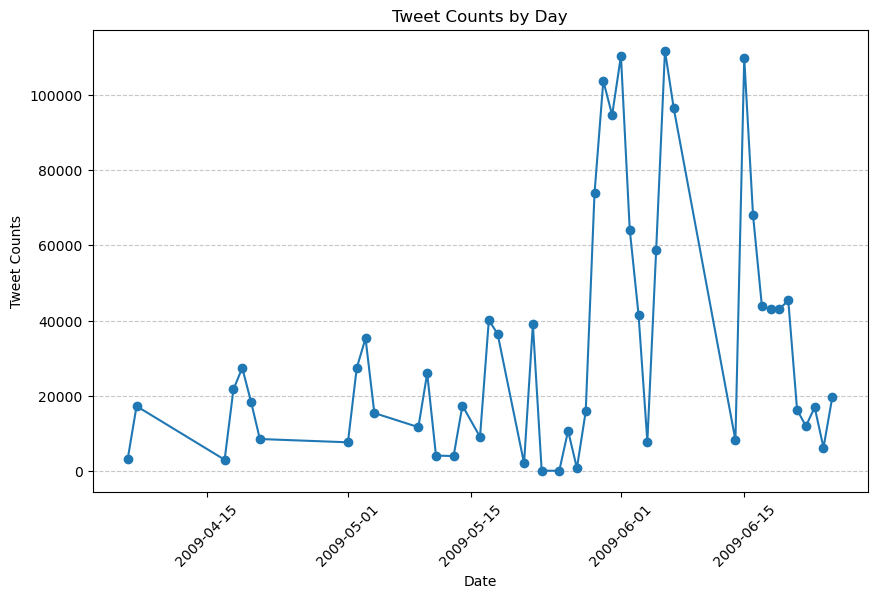

In [129]:
# Count tweets by day
tweets_by_day = df.groupby(['year', 'month', 'day']).size().reset_index(name='tweet_count')

# Convert year, month, and day back to datetime format
tweets_by_day['date'] = pd.to_datetime(tweets_by_day[['year', 'month', 'day']])

# Plot time series line plot of tweet counts by day
plt.figure(figsize=(10, 6))
plt.plot(tweets_by_day['date'], tweets_by_day['tweet_count'], marker='o')
plt.title('Tweet Counts by Day')
plt.xlabel('Date')
plt.ylabel('Tweet Counts')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

#### Inference: June 01 2009 saw the highest number of tweets, which was a Monday followed by 7-8 June. People were more active on Mondays during June

In [130]:
# Count occurrences based on 'day' and 'month' columns
day_month_counts = df.groupby(['day', 'month']).size().reset_index(name='count')

# Print the day-month counts
print(day_month_counts)


    day  month   count
0     1      5    7716
1     1      6  110290
2     2      5   27434
3     2      6   64192
4     3      5   35333
5     3      6   41588
6     4      5   15481
7     4      6    7842
8     5      6   58757
9     6      4    3360
10    6      6  111676
11    7      4   17311
12    7      6   96350
13    9      5   11739
14   10      5   26029
15   11      5    4186
16   13      5    4066
17   14      5   17460
18   14      6    8272
19   15      6  109781
20   16      5    9146
21   16      6   67980
22   17      4    3084
23   17      5   40154
24   17      6   44012
25   18      4   21754
26   18      5   36469
27   18      6   43004
28   19      4   27469
29   19      6   43136
30   20      4   18460
31   20      6   45364
32   21      4    8587
33   21      5    2132
34   21      6   16360
35   22      5   39074
36   22      6   12009
37   23      5     169
38   23      6   17002
39   24      6    6299
40   25      5     169
41   25      6   19694
42   26    

##### Based on the above dataset, we filter data only for 17-April as we run our POC model 

In [131]:
df = df[(df['month'] == 4) & (df['day'] == 17)]
# Display the filtered DataFrame
df.head()

,target,ids,date,flag,user,text,day,month,year
8575,0,1548274671,2009-04-17 20:30:31-07:00,NO_QUERY,xoLovebug224,Working on my songg for aunt nan. kinda hard...,17,4,2009
8576,0,1548274782,2009-04-17 20:30:34-07:00,NO_QUERY,Kerry_Baker,"can't sleep, it's 4.30am and i have to be up a...",17,4,2009
8577,0,1548275152,2009-04-17 20:30:38-07:00,NO_QUERY,glamorusindie81,wishing i could be at coachella this weekend ...,17,4,2009
8578,0,1548275569,2009-04-17 20:30:39-07:00,NO_QUERY,WOnet,"Well, @LilWO was having a tough day/night. Wan...",17,4,2009
8579,0,1548275799,2009-04-17 20:30:43-07:00,NO_QUERY,jessicakornberg,taking some much needed naked time. too bad i...,17,4,2009


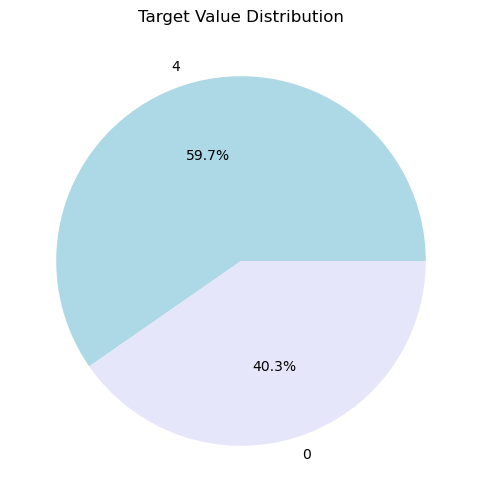

In [132]:
#Showing the different target values for the dataset
plt.figure(figsize=(6, 6))
df['target'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lavender', 'lightcoral'])
plt.title('Target Value Distribution')
plt.ylabel('')
plt.show()

#### Inference:  Most of the tweets have a positive sentiment (4) while only 40% have shown negative sentiments. There are no neutral tweets for  17 April 2009.


/var/folders/bs/gxskxrlj2n71b4v0t6wzkylc0000gn/T/ipykernel_12510/1334588222.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


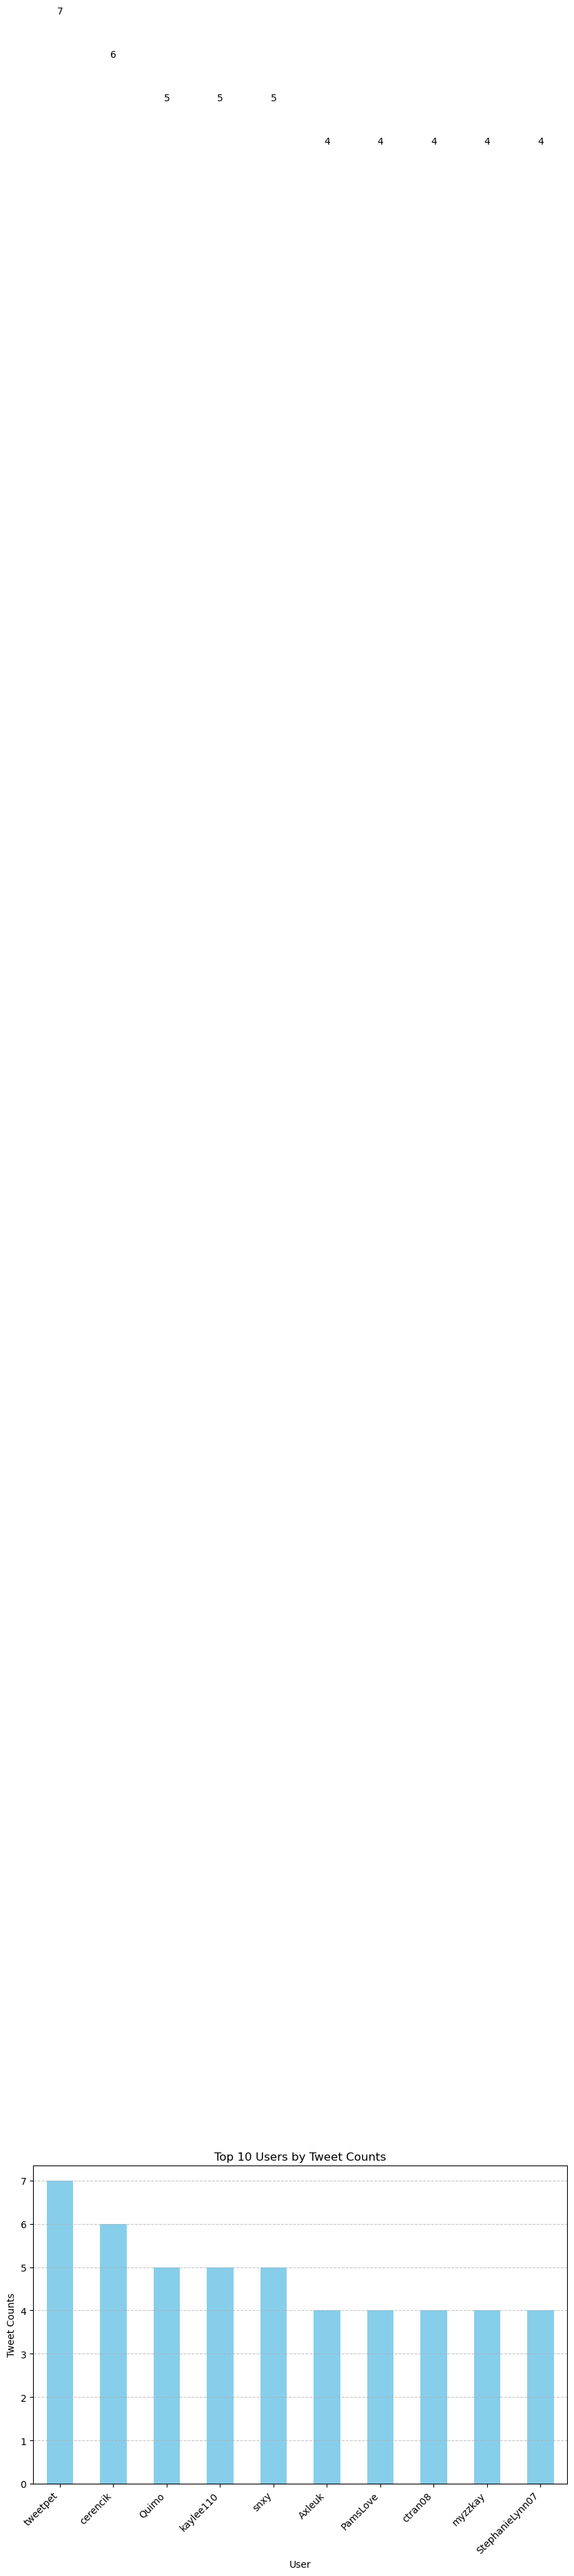

In [133]:

# Count tweets by user
tweets_by_user = df['user'].value_counts().sort_values(ascending=False)[:10]  # Top 10 users

# Plot bar chart of tweet counts by user
plt.figure(figsize=(10, 6))
tweets_by_user.plot(kind='bar', color='skyblue')
plt.title('Top 10 Users by Tweet Counts')
plt.xlabel('User')
plt.ylabel('Tweet Counts')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.xlabel('User')
plt.ylabel('Tweet Counts')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels to the bars
for i, count in enumerate(tweets_by_user):
    plt.text(i, count + 50, str(count), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

#### Inference: username "tweetpet" had the most number of tweets, followed by cerencik and Quimo

### Exporting new dataset after filtering the dataset

In [134]:
# Export the DataFrame to CSV
df.to_csv('filtered_data.csv', index=False)

print("DataFrame exported to 'filtered_data.csv'")

DataFrame exported to 'filtered_data.csv'
